# Lead Scoring Assignment
## Assignment is divided into three parts:
* Importing data and understanding data
* Data Cleaning and Preparation
* Outlier Analysis and Exploratory Data Analysis
* Model creation and performance 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [80]:
Lead=pd.read_csv("Leads.csv")
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [81]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning and preparation

In [82]:
#checking missing values
Count = Lead.isnull().sum().sort_values(ascending = False)
percentage = (Lead.isnull().sum()/Lead.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([Count, percentage], axis=1, keys=['Count', 'Percentage'])

,Count,Percentage
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


In [83]:
#dropping columns with more than 35% missing values
missing_cols = [col for col in Lead.columns if (Lead[col].isna().sum()/Lead.shape[0]*100) > 40]
Lead.drop(missing_cols, axis = 1, inplace = True)

In [84]:
x = (Lead.isna().sum()/Lead.shape[0]*100)
x[x > 0].sort_values(ascending = False)

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

In [85]:
#levels in City
Lead['City'].value_counts(dropna = False, normalize = True).mul(100).round(2)

Mumbai                         34.87
Select                         24.34
NaN                            15.37
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Select'),
  Text(2, 0, 'Thane & Outskirts'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Other Metro Cities'),
  Text(6, 0, 'Tier II Cities')])

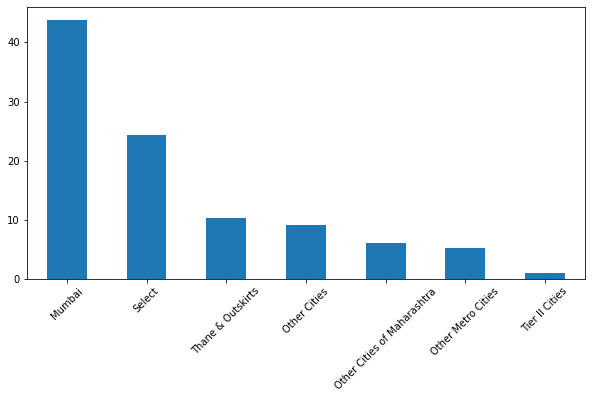

In [86]:
#imputing values in existing ratio
Lead['City'] = Lead['City'].fillna(pd.Series(np.random.choice(['Mumbai', 'Thane & Outskirts', 'Other Cities', 'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'],
                                             p=[0.59, 0.13, 0.12, 0.08, 0.07, 0.01], size=len(Lead))))
##levels in City now
Lead['City'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [10,5])
plt.xticks(rotation = 45)

In [87]:
#levels in Specialization
Lead['Specialization'].value_counts(dropna = False, normalize = True).mul(100).round(2)

Select                               21.02
NaN                                  15.56
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

<AxesSubplot:>

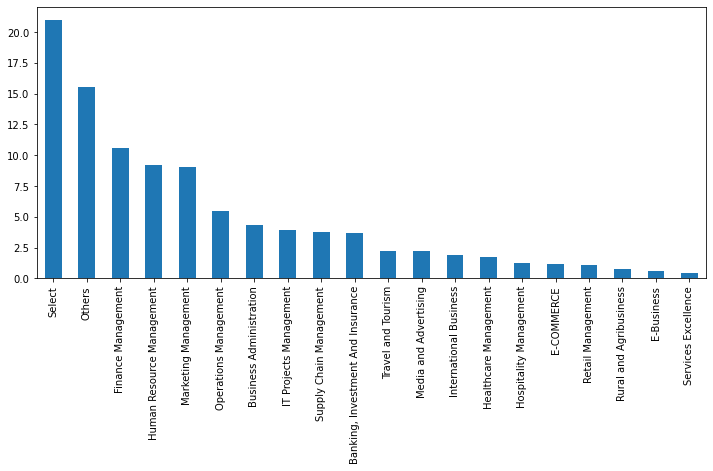

In [88]:
#Specialization is industry domain in which the customer worked before
Lead['Specialization'].fillna('Others', inplace = True)
Lead['Specialization'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [12,5])

In [89]:
Lead['Tags'].value_counts(dropna = False, normalize = True).mul(100).round(2)
Lead['Tags'].fillna('Unknown', inplace = True)

<AxesSubplot:>

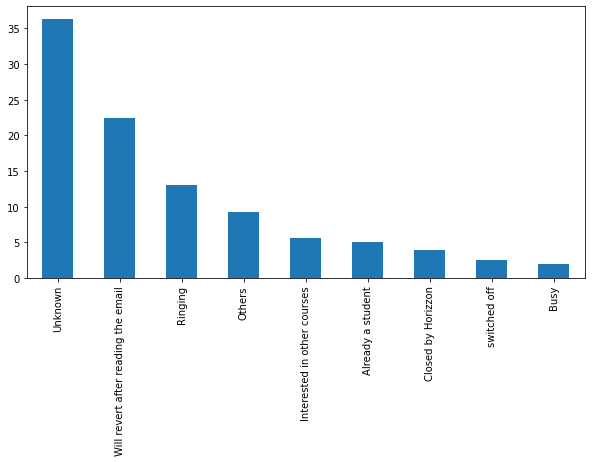

In [90]:
#combining less frequent levels into one, 'Others'
x = Lead['Tags'].value_counts(normalize = True).mul(100)
Lead['Tags'] = Lead['Tags'].replace(list(x[x < 2].index), 'Others')
Lead['Tags'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [10,5])

In [91]:
#levels in country
Lead['Country'].value_counts(dropna = False, normalize = True).mul(100).round(2)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Sweden                   0.03
Philippines              0.02
Uganda                   0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Asia/Pacific Region      0.02
China                    0.02
Belgium                  0.02
Ghana                    0.02
Kenya                    0.01
Sri Lanka                0.01
Tanzania                 0.01
Malaysia                 0.01
Liberia   

In [92]:
drop=['Prospect ID',
 'Lead Number',
 'What matters most to you in choosing a course',
 'Country','Lead Profile']

In [93]:
Lead.drop(drop, axis = 1, inplace = True)

In [94]:
#Remaining columns with missing values

x = (Lead.isna().sum()/Lead.shape[0]*100)
x[x > 0].sort_values(ascending = False)

What is your current occupation       29.112554
How did you hear about X Education    23.885281
TotalVisits                            1.482684
Page Views Per Visit                   1.482684
Last Activity                          1.114719
Lead Source                            0.389610
dtype: float64

for TotalVisits and Page Views Per Visit, we will be imputing median for nulls

In [95]:
med_totalvisits = Lead['TotalVisits'].median()
Lead['TotalVisits'].fillna(med_totalvisits, inplace = True)

In [96]:
med_PVPV = Lead['Page Views Per Visit'].median()
Lead['Page Views Per Visit'].fillna(med_PVPV, inplace = True)

In [97]:
Lead['Last Activity'].value_counts(dropna = False, normalize = True).mul(100).round(2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
NaN                              1.11
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

For Last activity we will be using Mode to impute nulls

In [98]:
Lead['Last Activity'].fillna('Email Opened', inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'SMS Sent'),
  Text(2, 0, 'Olark Chat Conversation'),
  Text(3, 0, 'Page Visited on Website'),
  Text(4, 0, 'Converted to Lead'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unreachable'),
  Text(9, 0, 'Unsubscribed'),
  Text(10, 0, 'Had a Phone Conversation'),
  Text(11, 0, 'Approached upfront'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Email Received'),
  Text(14, 0, 'Email Marked Spam'),
  Text(15, 0, 'Visited Booth in Tradeshow'),
  Text(16, 0, 'Resubscribed to emails')])

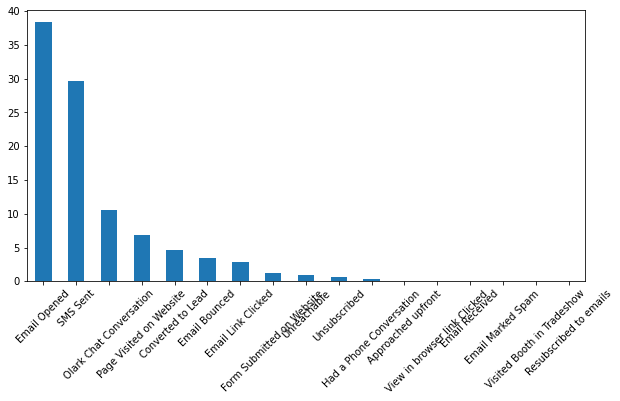

In [99]:
Lead['Last Activity'] = Lead['Last Activity'].replace(list(x[x < 2].index), 'Others')
Lead['Last Activity'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [10,5])
plt.xticks(rotation = 45)

In [100]:
Lead['Lead Source'].value_counts(dropna = False, normalize = True).mul(100).round(2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
NaN                   0.39
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

For Lead Source, we will be using mode to impute nulls

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Google'),
  Text(1, 0, 'Direct Traffic'),
  Text(2, 0, 'Olark Chat'),
  Text(3, 0, 'Organic Search'),
  Text(4, 0, 'Reference'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Referral Sites'),
  Text(7, 0, 'Others')])

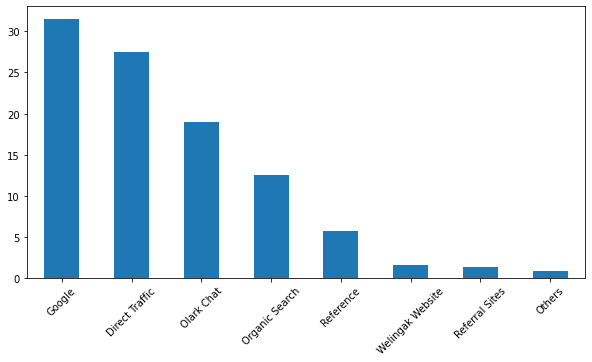

In [101]:

Lead['Lead Source'] = Lead['Lead Source'].replace(np.nan,'Google')


Lead['Lead Source'] = Lead['Lead Source'].replace('google','Google')


mode = Lead['Lead Source'].value_counts(normalize = True).mul(100)
Lead['Lead Source'] = Lead['Lead Source'].replace(list(mode[mode < 1].index), 'Others')
Lead['Lead Source'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [10,5])
plt.xticks(rotation = 45)

In [102]:
Lead.isna().any()

Lead Origin                                 False
Lead Source                                 False
Do Not Email                                False
Do Not Call                                 False
Converted                                   False
TotalVisits                                 False
Total Time Spent on Website                 False
Page Views Per Visit                        False
Last Activity                               False
Specialization                              False
How did you hear about X Education           True
What is your current occupation              True
Search                                      False
Magazine                                    False
Newspaper Article                           False
X Education Forums                          False
Newspaper                                   False
Digital Advertisement                       False
Through Recommendations                     False
Receive More Updates About Our Courses      False


All Missing Value Columns have been treated

### Outlier Analysis and Exploratory Data Analysis

In [103]:
def box_plot(x):
    ax = sns.boxplot(y = Lead[x], color = 'darkcyan', showfliers = True, showmeans = True, 
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(x), fontsize = 14, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

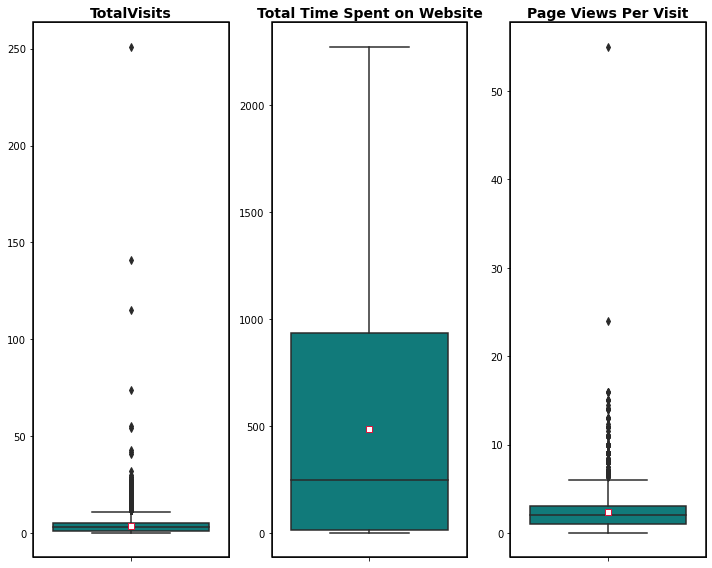

In [104]:
plt.figure(figsize = [10,8])
num_cols = [col for col in Lead.select_dtypes(include = np.number).columns if col != 'Converted']
for i in range(len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    box_plot(num_cols[i])
plt.tight_layout()

We can see that Total Visits and Page Views per Visit has outliers which might impact performance of the model

In [105]:
TV_limit = Lead['TotalVisits'].quantile(0.995)
PVPV_limit = Lead['Page Views Per Visit'].quantile(0.995)

In [106]:
Lead = Lead[~((Lead['TotalVisits'] > TV_limit) | (Lead['Page Views Per Visit'] > PVPV_limit))]

### EDA

In [107]:
Lead['Converted'].value_counts()

0    5636
1    3531
Name: Converted, dtype: int64

We can see that target variable is imbalanced

In [108]:
cat_col = [col for col in Lead.select_dtypes(exclude = np.number).columns]
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [109]:
Lead[cat_col].nunique().sort_values()

I agree to pay the amount through cheque     1
Get updates on DM Content                    1
Update me on Supply Chain Content            1
Receive More Updates About Our Courses       1
Magazine                                     1
X Education Forums                           2
Do Not Email                                 2
Do Not Call                                  2
Through Recommendations                      2
Search                                       2
Newspaper Article                            2
A free copy of Mastering The Interview       2
Newspaper                                    2
Digital Advertisement                        2
Lead Origin                                  5
What is your current occupation              6
City                                         7
Lead Source                                  8
Tags                                         9
How did you hear about X Education          10
Last Notable Activity                       16
Last Activity

Removing Varibales with one level

In [110]:
y = Lead[cat_col].nunique()
drop1 = list(y[y < 2].index)
drop1

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [111]:
Lead.drop(drop1, axis = 1, inplace = True)

In [113]:
cat_col = list(set(cat_col) - set(drop1))
x = Lead[cat_col].nunique()
binary_cat_cols = list(x[x == 2].index)
binary_cat_cols

['Newspaper Article',
 'Search',
 'Digital Advertisement',
 'Do Not Email',
 'Through Recommendations',
 'X Education Forums',
 'Do Not Call',
 'A free copy of Mastering The Interview',
 'Newspaper']

### Model Creation and performance

### We will be one hot encoding the categorical Variables

In [114]:

cat_col = [col for col in Lead.select_dtypes(exclude = np.number).columns]
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [115]:

def binary_map(y):
    return y.map({'Yes': 1, "No": 0})

Lead[binary_cat_cols] = Lead[binary_cat_cols].apply(binary_map)

### We will be creating dummy variables for other categorical variables

In [118]:
# Leads Origin
lo = pd.get_dummies(Lead['Lead Origin'], prefix = 'Lead Origin')
lo = lo.drop(['Lead Origin_Lead Import'], axis = 1)
Lead = pd.concat([Lead, lo], axis = 1)

# Lead Source
ls = pd.get_dummies(Lead['Lead Source'], prefix = 'Lead Source')
ls = ls.drop(['Lead Source_Others'], axis = 1)
Lead = pd.concat([Lead, ls], axis = 1)


# Specialization
sp = pd.get_dummies(Lead['Specialization'], prefix = 'Specialization')
sp = sp.drop(['Specialization_Others'], axis = 1)
Lead = pd.concat([Lead, sp], axis = 1)

# What is your current occupation
wco = pd.get_dummies(Lead['What is your current occupation'], prefix = 'What is your current occupation')
wco = wco.drop(['What is your current occupation_Other'], axis = 1)
Lead = pd.concat([Lead, wco], axis = 1)

# Tags
tg = pd.get_dummies(Lead['Tags'], prefix = 'Tags')
tg = tg.drop(['Tags_Others'], axis = 1)
Lead = pd.concat([Lead, tg], axis = 1)

# City
ct = pd.get_dummies(Lead['City'], prefix = 'City')
ct = ct.drop(['City_Other Cities'], axis = 1)
Lead = pd.concat([Lead, ct], axis = 1)


In [119]:
cols = list(set(cat_col) - set(binary_cat_cols))
Lead.drop(cols, axis = 1, inplace = True)

### Splitting test and train data

In [120]:
X = Lead.drop('Converted', axis = 1)
y = Lead['Converted']

In [121]:
Xa = np.array(X)
ya = np.array(y.tolist())

We will use stratified k-fold to split the data

In [122]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 10)
for train_index, test_index in skf.split(Xa, ya):
    X_train, y_train = Xa[train_index], ya[train_index]
    X_test, y_test = Xa[test_index], ya[test_index]
    break

In [123]:
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns
X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

We would need to scale numerical variables

In [124]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [125]:

scaler = StandardScaler()

#fitting scaler and transforming X_train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#transforming X_test
X_test[num_cols] = scaler.transform(X_test[num_cols])

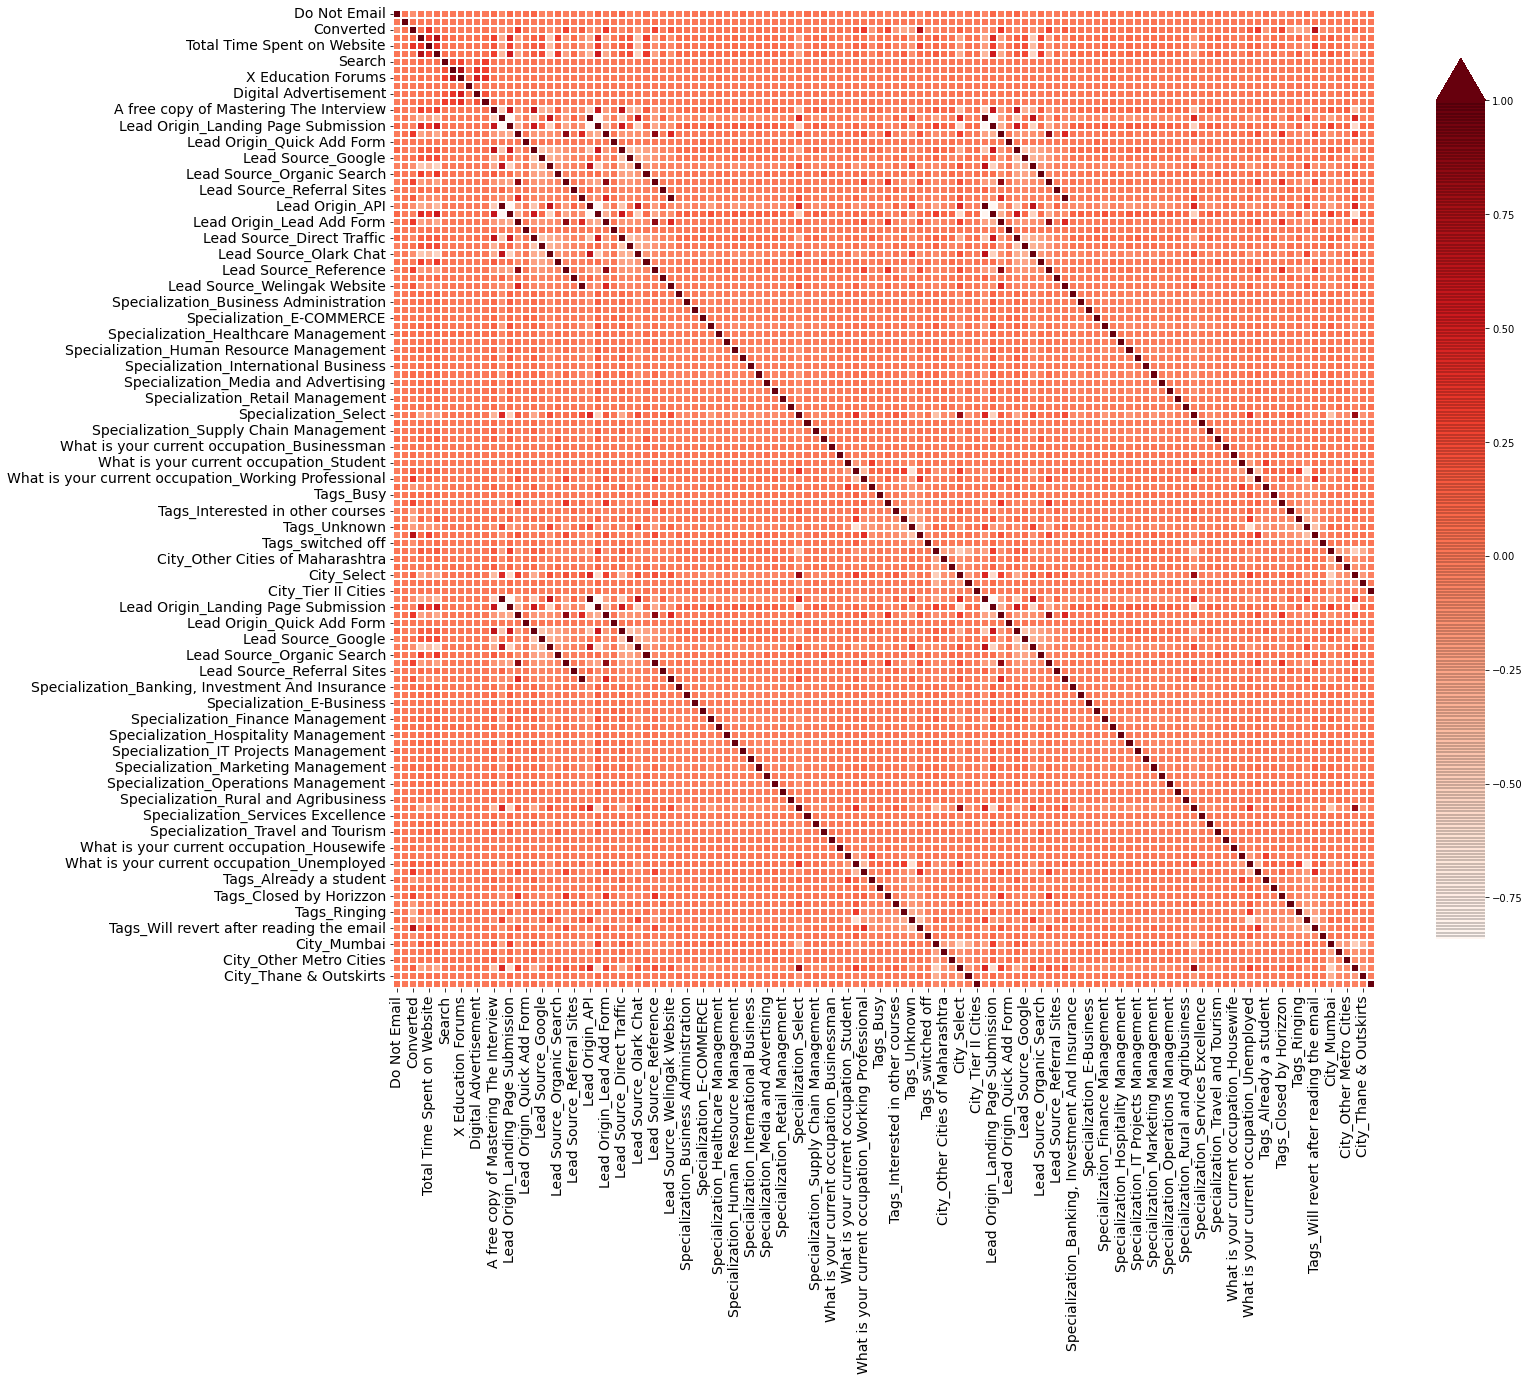

In [127]:

plt.figure(figsize = [22,18])
cbar_kws={'orientation':'vertical', 'shrink':0.9,'extend':'max',
          'extendfrac':0.05, 'drawedges':True, 'pad':0.05, 'aspect':18}
sns.heatmap(Lead.corr(), annot = False, cmap = 'Reds', linecolor = 'w', linewidth = 0.2, cbar_kws = cbar_kws)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

We can see high correlation between variables. So we can conclude that data has multicollinearity

### We will be building Logistic Regression Model

In [128]:
def build_model(cols):
    # Logistic regression model
    X_train_sm = sm.add_constant(X_train[cols])
    logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    lr = logm.fit()
    return lr

In [129]:
cols = X.columns
lr1 = build_model(cols)
print(lr1.summary())

C:\Users\saika\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\saika\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\saika\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7333
Model:                            GLM   Df Residuals:                     7272
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 03 Jan 2023   Deviance:                       74512.
Time:                        19:16:27   Pearson chi2:                 3.64e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

We will be performing Feature Selectiin using RFE

In [130]:
from sklearn.feature_selection import RFE
model = LogisticRegression()
selector = RFE(estimator = model, n_features_to_select = 18)
selector.fit(X_train, y_train)
L = list(zip(X_train.columns,selector.support_,selector.ranking_))
L

C:\Users\saika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\saika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\saika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[('Do Not Email', False, 3),
 ('Do Not Call', False, 104),
 ('TotalVisits', False, 55),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 54),
 ('Search', False, 94),
 ('Newspaper Article', False, 50),
 ('X Education Forums', False, 47),
 ('Newspaper', False, 53),
 ('Digital Advertisement', False, 23),
 ('Through Recommendations', False, 20),
 ('A free copy of Mastering The Interview', False, 73),
 ('Lead Origin_API', False, 70),
 ('Lead Origin_Landing Page Submission', False, 91),
 ('Lead Origin_Lead Add Form', False, 9),
 ('Lead Origin_Quick Add Form', False, 68),
 ('Lead Source_Direct Traffic', False, 81),
 ('Lead Source_Google', False, 96),
 ('Lead Source_Olark Chat', False, 21),
 ('Lead Source_Organic Search', False, 75),
 ('Lead Source_Reference', False, 103),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Welingak Website', False, 7),
 ('Lead Origin_API', False, 80),
 ('Lead Origin_Landing Page Submission', False, 84),
 ('Lead Origin_Lead A

In [131]:
selected_cols = X_train.columns[selector.support_]
selected_cols

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email',
       'Lead Source_Welingak Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

We will be fine tuning using VIF

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(cols):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [133]:
cols = selected_cols

lr = build_model(cols)
print(lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7333
Model:                            GLM   Df Residuals:                     7320
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2107.0
Date:                Tue, 03 Jan 2023   Deviance:                       4214.0
Time:                        19:18:37   Pearson chi2:                 8.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5316
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [134]:

get_vif(cols)

C:\Users\saika\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\saika\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\saika\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\saika\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\saika\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\saika\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: Runtime

,Features,VIF
0,Lead Source_Welingak Website,inf
28,Tags_Already a student,inf
21,Lead Source_Welingak Website,inf
22,What is your current occupation_Student,inf
23,What is your current occupation_Student,inf
24,What is your current occupation_Unemployed,inf
25,What is your current occupation_Unemployed,inf
26,What is your current occupation_Working Profes...,inf
27,What is your current occupation_Working Profes...,inf
29,Tags_Already a student,inf


We will be dropping some varibales having high VIF

In [137]:
cols = ['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off']

In [138]:
lr = build_model(cols)
print(lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7333
Model:                            GLM   Df Residuals:                     7319
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1990.7
Date:                Tue, 03 Jan 2023   Deviance:                       3981.4
Time:                        19:20:22   Pearson chi2:                 8.44e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5462
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

We will be dropping variables with high P value

In [142]:
cols = ['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off']

In [143]:
lr = build_model(cols)
print(lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7333
Model:                            GLM   Df Residuals:                     7320
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1992.7
Date:                Tue, 03 Jan 2023   Deviance:                       3985.4
Time:                        19:22:21   Pearson chi2:                 8.44e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5460
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [144]:
get_vif(cols)

C:\Users\saika\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\saika\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\saika\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\saika\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\saika\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\saika\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: Runtime

,Features,VIF
12,What is your current occupation_Working Profes...,inf
13,Tags_Already a student,inf
23,Tags_switched off,inf
22,Tags_Will revert after reading the email,inf
21,Tags_Will revert after reading the email,inf
20,Tags_Ringing,inf
19,Tags_Ringing,inf
18,Tags_Interested in other courses,inf
17,Tags_Interested in other courses,inf
16,Tags_Closed by Horizzon,inf


In [145]:
X_train = X_train[cols]
X_test = X_test[cols]

# switching off the relularization in scikit-learn by setting penalty='none' so that the result is identical to statsmodel's result.
lr_model = LogisticRegression(penalty = 'none', solver = 'newton-cg')
lr_model.fit(X_train,y_train)

#prediction on train set
y_train_prob = lr_model.predict_proba(X_train)[:,1]

In [146]:
#creating a dataframe to store Lead Score, y_train, and predictions together
lr_pred = pd.DataFrame({'Converted': y_train, 'Convert_prob': y_train_prob, 'Lead Score': (y_train_prob*100).round(2)})

#obtaining results for a cut-off of 0.5
lr_pred['predicted'] = lr_pred['Convert_prob'].map(lambda x: 1 if x > 0.5 else 0)
lr_pred.head()

,Converted,Convert_prob,Lead Score,predicted
0,0,0.013659,1.37,0
1,1,0.992063,99.21,1
2,0,0.013236,1.32,0
3,1,0.990251,99.03,1
4,0,0.195185,19.52,0


Generating Classification report

In [147]:
print(classification_report(lr_pred['Converted'], lr_pred['predicted']))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4508
           1       0.90      0.80      0.85      2825

    accuracy                           0.89      7333
   macro avg       0.89      0.87      0.88      7333
weighted avg       0.89      0.89      0.89      7333



Building Confusion Matrix


Overall Accuracy Score : 0.89




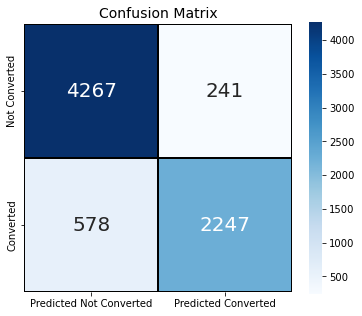

In [148]:
cm = confusion_matrix(lr_pred['Converted'], lr_pred['predicted'])
cm_df = pd.DataFrame(data = cm)

plt.figure(figsize = (6,5))
sns.heatmap(cm_df, fmt='g', 
            yticklabels=['Not Converted', 'Converted'],
            xticklabels=['Predicted Not Converted', 'Predicted Converted'],
            annot=True,
            linewidths=.2,linecolor="k", cmap = "Blues", square=True, annot_kws={"fontsize":20})
plt.title('Confusion Matrix', fontsize=14)
print('\nOverall Accuracy Score : {}\n\n'.format(accuracy_score(lr_pred['Converted'], lr_pred['predicted']).round(2)))
plt.show()

### ROC Curve

In [149]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

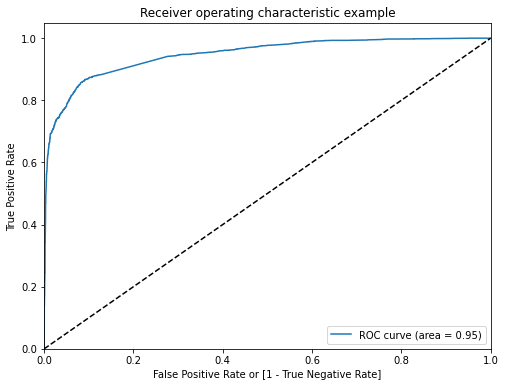

In [150]:
plot_roc(lr_pred['Converted'], lr_pred['Convert_prob'])

In [151]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lr_pred[i]= lr_pred['Convert_prob'].map(lambda x: 1 if x > i else 0)
lr_pred.head()

,Converted,Convert_prob,Lead Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.013659,1.37,0,1,0,0,0,0,0,0,0,0,0
1,1,0.992063,99.21,1,1,1,1,1,1,1,1,1,1,1
2,0,0.013236,1.32,0,1,0,0,0,0,0,0,0,0,0
3,1,0.990251,99.03,1,1,1,1,1,1,1,1,1,1,1
4,0,0.195185,19.52,0,1,1,0,0,0,0,0,0,0,0


In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob_thresh','accuracy','sensi','speci'])

num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = confusion_matrix(lr_pred['Converted'], lr_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob_thresh  accuracy     sensi     speci
0.0          0.0  0.385245  1.000000  0.000000
0.1          0.1  0.683349  0.976991  0.499335
0.2          0.2  0.879722  0.881416  0.878660
0.3          0.3  0.893359  0.858761  0.915040
0.4          0.4  0.892131  0.828673  0.931899
0.5          0.5  0.888313  0.795398  0.946539
0.6          0.6  0.883131  0.752212  0.965173
0.7          0.7  0.877404  0.717168  0.977817
0.8          0.8  0.872767  0.694867  0.984250
0.9          0.9  0.858448  0.648850  0.989796


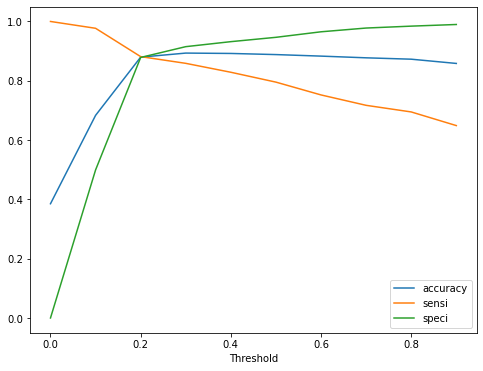

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob_thresh', y=['accuracy','sensi','speci'], figsize=(8, 6))
plt.xlabel('Threshold')
plt.show()

In [154]:
#confusion matrix for cut-off of 0.3
y_train_pred = np.array([1 if i > 0.3 else 0 for i in y_train_prob])
print('\nOverall Accuracy Score : {}\n'.format(accuracy_score(y_train, y_train_pred).round(2)))
print('Train confusion matrix: \n\n {}'.format(confusion_matrix(y_train, y_train_pred)))


Overall Accuracy Score : 0.89

Train confusion matrix: 

 [[4125  383]
 [ 399 2426]]


In [155]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(lr_pred['Converted'], lr_pred['Convert_prob'])

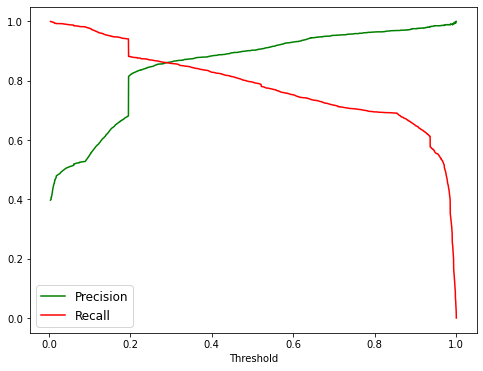

In [156]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, p[:-1], "g-", label = 'Precision')
plt.plot(thresholds, r[:-1], "r-", label = 'Recall')
plt.xlabel('Threshold')
plt.legend(fontsize = 12)
plt.show()

In [157]:
#confusion matrix for cut-off of 0.27
y_train_pred = np.array([1 if i > 0.27 else 0 for i in y_train_prob])
print('\nOverall Accuracy : {}%\n'.format((accuracy_score(y_train, y_train_pred)*100).round(2)))
print('Train confusion matrix: \n\n {}'.format(confusion_matrix(y_train, y_train_pred)))


Overall Accuracy : 89.23%

Train confusion matrix: 

 [[4098  410]
 [ 380 2445]]


In [158]:
print('\nIn-sample Precision Score   : {}%\n'.format((precision_score(y_train, y_train_pred)*100).round(2)))
print('In-sample Recall Score      : {}%\n'.format((recall_score(y_train, y_train_pred)*100).round(2)))
print('In-sample F-measure         : {}%\n'.format((f1_score(y_train, y_train_pred)*100).round(2)))


In-sample Precision Score   : 85.64%

In-sample Recall Score      : 86.55%

In-sample F-measure         : 86.09%



Cross Validation

In [159]:
#prediction on test set
y_prob = lr_model.predict_proba(X_test)[:,1]

In [160]:
#creating a dataframe to store Lead Score, y_test, and predictions together
lr_test = pd.DataFrame({'Converted': y_test, 'Convert_prob': y_prob, 'Lead Score': (y_prob*100).round(2)})

#obtaining results for the cut-off of 0.27
lr_test['final_predicted'] = lr_test['Convert_prob'].map(lambda x: 1 if x > 0.27 else 0)
lr_test.head()

,Converted,Convert_prob,Lead Score,final_predicted
0,0,0.027243,2.72,0
1,0,0.037550,3.75,0
2,1,0.739905,73.99,1
3,1,0.987816,98.78,1
4,0,0.008612,0.86,0



Overall Accuracy : 89.53%




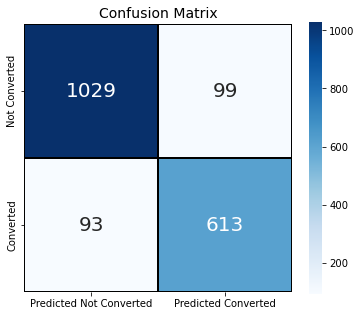

In [161]:
#Confusion Matrix for test data
cm = confusion_matrix(lr_test['Converted'], lr_test['final_predicted'])
cm_df = pd.DataFrame(data = cm)

plt.figure(figsize = (6,5))
sns.heatmap(cm_df, fmt='g', 
            yticklabels=['Not Converted', 'Converted'],
            xticklabels=['Predicted Not Converted', 'Predicted Converted'],
            annot=True,
            linewidths = 0.2, linecolor="k", cmap = "Blues", square=True, annot_kws={"fontsize":20})
plt.title('Confusion Matrix', fontsize=14)
print('\nOverall Accuracy : {}%\n\n'.format((accuracy_score(lr_test['Converted'], lr_test['final_predicted'])*100).round(2)))
plt.show()

In [162]:
#classification report
print('\nTest Precision Score   : {}%\n'.format((precision_score(lr_test['Converted'], lr_test['final_predicted'])*100).round(2)))
print('Test Recall Score      : {}%\n'.format((recall_score(lr_test['Converted'], lr_test['final_predicted'])*100).round(2)))
print('Test F-measure         : {}%\n'.format((f1_score(lr_test['Converted'], lr_test['final_predicted'])*100).round(2)))


Test Precision Score   : 86.1%

Test Recall Score      : 86.83%

Test F-measure         : 86.46%



We can intrepret from above model that the following variables impact our lead outcome:
1. 'Do Not Email', 
2. 'Total Time Spent on Website',
3. 'Lead Origin_Lead Add Form', 
4. 'Lead Source_Olark Chat',
5. 'Lead Source_Welingak Website',
6. 'What is your current occupation_Working Professional',
7. 'Tags_Already a student', 
8. 'Tags_Closed by Horizzon',
9. 'Tags_Interested in other courses',
10. 'Tags_Ringing',
11. 'Tags_Will revert after reading the email',
12. 'Tags_switched off'

C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


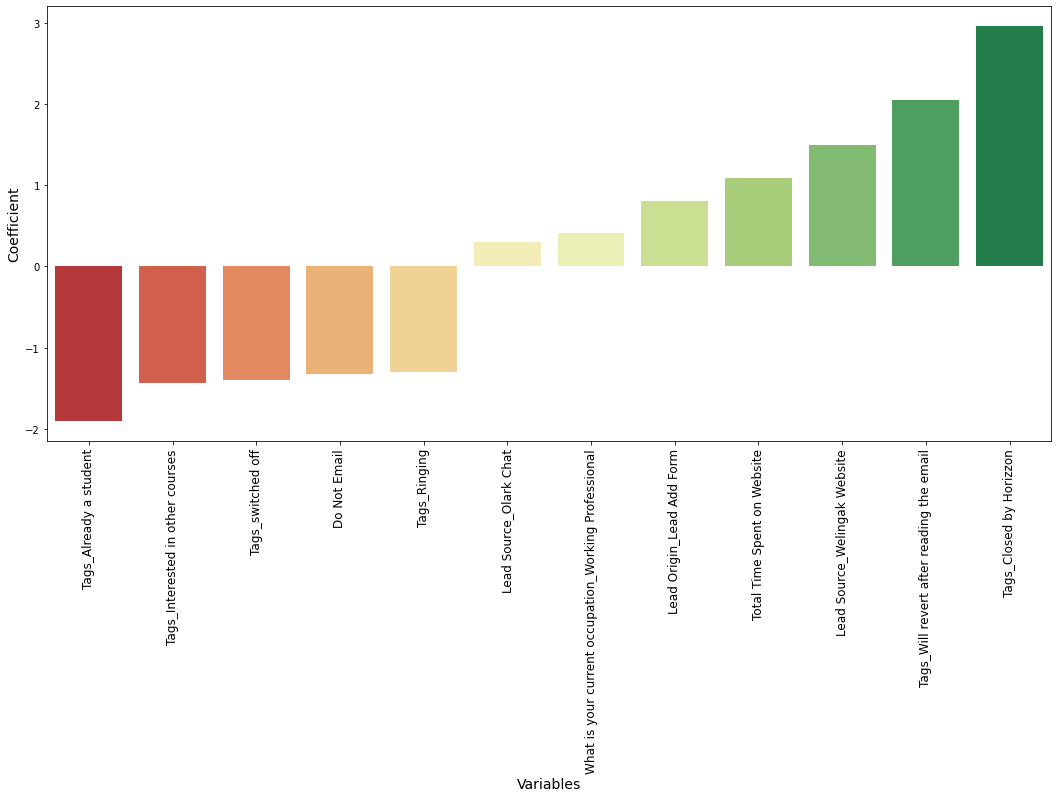

In [163]:
param_df = pd.DataFrame({'Variable': lr_model.feature_names_in_, 'Coefficient': lr_model.coef_.reshape(-1)}).reset_index()
param_df = param_df.sort_values('Coefficient')

plt.figure(figsize = [18,8])
#px.bar(param_df, x = 'Variable', y = 'Coefficient', height = 1000)
sns.barplot(param_df['Variable'], param_df['Coefficient'], palette = 'RdYlGn')
plt.ylabel('Coefficient', fontsize = 14)
plt.xlabel('Variables', fontsize = 14)
plt.xticks(fontsize = 12, rotation = 90)

plt.show()